In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Fifa 23 Players Data.csv")
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [3]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [5]:
df.shape

(18539, 89)

In [6]:
df = df.drop(["Image Link"], axis=1)

In [7]:
df["Best Position"].value_counts()

Best Position
CB     3658
ST     2565
CAM    2311
GK     2061
RM     1443
CDM    1403
CM     1104
RB      925
LB      864
LM      797
RWB     422
LWB     404
RW      297
LW      215
CF       70
Name: count, dtype: int64

In [8]:
positions = df["Best Position"].value_counts().index
positions

Index(['CB', 'ST', 'CAM', 'GK', 'RM', 'CDM', 'CM', 'RB', 'LB', 'LM', 'RWB',
       'LWB', 'RW', 'LW', 'CF'],
      dtype='object', name='Best Position')

In [9]:
def get_top_10(position):
    df_position = df[df["Best Position"] == position]
    df_position = df_position.sort_values(by="Overall", ascending=False).head(10)
    df_position = df_position["Known As"]
    return df_position.tolist()

In [10]:
for position in positions:
    print("Top 10 Players for position: ", position)
    print(get_top_10(position))
    print(" ")

Top 10 Players for position:  CB
['V. van Dijk', 'Marquinhos', 'Rúben Dias', 'A. Rüdiger', 'K. Koulibaly', 'D. Alaba', 'Thiago Silva', 'A. Laporte', 'M. Škriniar', 'M. de Ligt']
 
Top 10 Players for position:  ST
['R. Lewandowski', 'K. Mbappé', 'Cristiano Ronaldo', 'H. Kane', 'E. Haaland', 'C. Immobile', 'R. Lukaku', 'L. Martínez', 'P. Aubameyang', 'Gerard Moreno']
 
Top 10 Players for position:  CAM
['L. Messi', 'Bernardo Silva', 'T. Müller', 'P. Dybala', 'Bruno Fernandes', 'C. Nkunku', 'N. Fekir', 'P. Foden', 'M. Reus', 'M. Mount']
 
Top 10 Players for position:  GK
['T. Courtois', 'M. Neuer', 'J. Oblak', 'Ederson', 'Alisson', 'G. Donnarumma', 'K. Navas', 'M. ter Stegen', 'De Gea', 'M. Maignan']
 
Top 10 Players for position:  RM
['S. Gnabry', 'Canales', 'F. Chiesa', 'M. Diaby', 'L. Díaz', 'D. Berardi', 'Ronaldo Cabrais', 'C. Gakpo', 'Otávio', 'N. Mazraoui']
 
Top 10 Players for position:  CDM
['Casemiro', 'N. Kanté', 'J. Kimmich', 'Rodri', 'Fabinho', 'M. Brozović', 'Sergio Busquets'

Combine RWB to RB, LWB to LB, CF to ST, RM to RW, LM to LW

In [11]:
position_mapping = {
    "RM": "RW",  ## changed
    "LM": "LW",  ## changed
    "RWB": "RB",  ## changed
    "LWB": "LB",  ## changed
    "CF": "ST",  ## changed
}
positions_to_be_changed = position_mapping.keys()
for i in range(len(df)):
    if df.loc[i, "Best Position"] in positions_to_be_changed:
        df.loc[i, "Best Position"] = position_mapping.get(df.loc[i, "Best Position"])

In [12]:
df["Best Position"].value_counts().index.tolist()

['CB', 'ST', 'CAM', 'GK', 'RW', 'CDM', 'RB', 'LB', 'CM', 'LW']

In [13]:
# For each position get top 10 players:
positions = df["Best Position"].value_counts().index.tolist()
for position in positions:
    print("Top 10 Players for position: ", position)
    print(get_top_10(position))
    print(" ")

Top 10 Players for position:  CB
['V. van Dijk', 'Marquinhos', 'Rúben Dias', 'A. Rüdiger', 'K. Koulibaly', 'D. Alaba', 'Thiago Silva', 'A. Laporte', 'M. Škriniar', 'M. de Ligt']
 
Top 10 Players for position:  ST
['K. Benzema', 'K. Mbappé', 'R. Lewandowski', 'Cristiano Ronaldo', 'H. Kane', 'E. Haaland', 'C. Immobile', 'R. Lukaku', 'L. Martínez', 'J. Vardy']
 
Top 10 Players for position:  CAM
['L. Messi', 'Bernardo Silva', 'T. Müller', 'P. Dybala', 'Bruno Fernandes', 'C. Nkunku', 'N. Fekir', 'P. Foden', 'M. Reus', 'M. Mount']
 
Top 10 Players for position:  GK
['T. Courtois', 'M. Neuer', 'J. Oblak', 'Ederson', 'Alisson', 'G. Donnarumma', 'K. Navas', 'M. ter Stegen', 'De Gea', 'M. Maignan']
 
Top 10 Players for position:  RW
['M. Salah', 'R. Mahrez', 'S. Gnabry', 'D. Berardi', 'Canales', 'Á. Di María', 'F. Chiesa', 'M. Diaby', 'L. Díaz', 'Marco Asensio']
 
Top 10 Players for position:  CDM
['Casemiro', 'N. Kanté', 'J. Kimmich', 'Rodri', 'Fabinho', 'M. Brozović', 'Sergio Busquets', 'T. P

In [14]:
def get_top_10_category(data, category):
    return (
        data[
            [
                "Known As",
                "Overall",
                "Potential",
                "Nationality",
                "Club Name",
                "Best Position",
            ]
        ]
        .sort_values(by=category, ascending=False)
        .head(10)
    )

In [15]:
# Get top 10 players based on Overall rating
get_top_10_category(df, "Overall")

,Known As,Overall,Potential,Nationality,Club Name,Best Position
0,L. Messi,91,91,Argentina,Paris Saint-Germain,CAM
2,R. Lewandowski,91,91,Poland,FC Barcelona,ST
3,K. De Bruyne,91,91,Belgium,Manchester City,CM
4,K. Mbappé,91,95,France,Paris Saint-Germain,ST
1,K. Benzema,91,91,France,Real Madrid CF,ST
5,M. Salah,90,90,Egypt,Liverpool,RW
6,T. Courtois,90,91,Belgium,Real Madrid CF,GK
7,M. Neuer,90,90,Germany,FC Bayern München,GK
8,Cristiano Ronaldo,90,90,Portugal,Manchester United,ST
9,V. van Dijk,90,90,Netherlands,Liverpool,CB


In [16]:
# Get top 10 players based on Potential Rating
get_top_10_category(df, "Potential")

,Known As,Overall,Potential,Nationality,Club Name,Best Position
4,K. Mbappé,91,95,France,Paris Saint-Germain,ST
21,E. Haaland,88,94,Norway,Manchester City,ST
82,Pedri,85,93,Spain,FC Barcelona,CM
83,P. Foden,85,92,England,Manchester City,CAM
63,Vinícius Jr.,86,92,Brazil,Real Madrid CF,LW
42,F. de Jong,87,92,Netherlands,FC Barcelona,CM
22,G. Donnarumma,88,92,Italy,Paris Saint-Germain,GK
0,L. Messi,91,91,Argentina,Paris Saint-Germain,CAM
16,Ederson,89,91,Brazil,Manchester City,GK
1,K. Benzema,91,91,France,Real Madrid CF,ST


In [17]:
# Get top 10 Under 21 players based on Overall Rating
get_top_10_category(df[df["Age"] <= 21], ["Overall", "Potential"])

,Known As,Overall,Potential,Nationality,Club Name,Best Position
21,E. Haaland,88,94,Norway,Manchester City,ST
63,Vinícius Jr.,86,92,Brazil,Real Madrid CF,LW
82,Pedri,85,93,Spain,FC Barcelona,CM
124,J. Bellingham,84,91,England,Borussia Dortmund,CM
141,A. Davies,84,89,Canada,FC Bayern München,LW
225,F. Wirtz,82,91,Germany,Bayer 04 Leverkusen,CAM
229,B. Saka,82,89,England,Arsenal,LW
302,J. Musiala,81,90,Germany,FC Bayern München,CAM
301,J. Gvardiol,81,89,Croatia,RB Leipzig,CB
297,Rodrygo,81,88,Brazil,Real Madrid CF,RW


In [18]:
df["Overall"].value_counts(bins=10, sort=False)

Overall
(46.955000000000005, 51.4]     329
(51.4, 55.8]                   986
(55.8, 60.2]                  2418
(60.2, 64.6]                  4060
(64.6, 69.0]                  5528
(69.0, 73.4]                  2867
(73.4, 77.8]                  1495
(77.8, 82.2]                   658
(82.2, 86.6]                   155
(86.6, 91.0]                    43
Name: count, dtype: int64

<Axes: xlabel='Overall', ylabel='Count'>

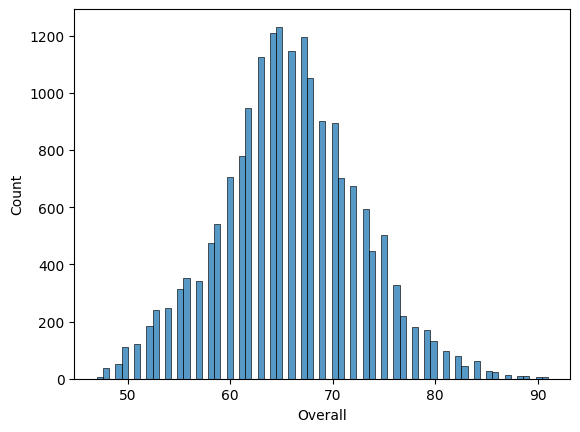

In [19]:
sns.histplot(x=df["Overall"])

Majority of the players lie between 60 to 80 Overall Rating

## Height and Weight vs the Overall Rating

<Axes: xlabel='Overall', ylabel='Height(in cm)'>

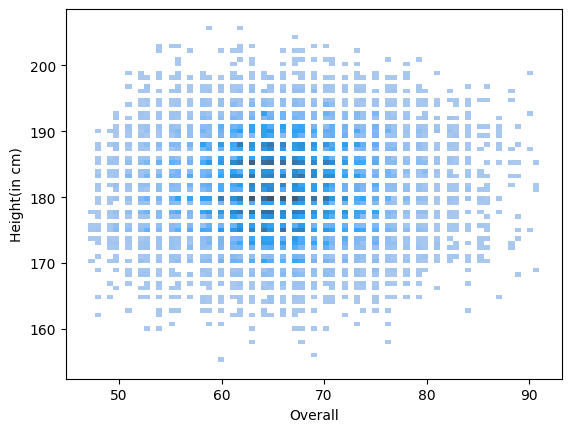

In [20]:
sns.histplot(x=df["Overall"], y=df["Height(in cm)"])

<Axes: xlabel='Overall', ylabel='Weight(in kg)'>

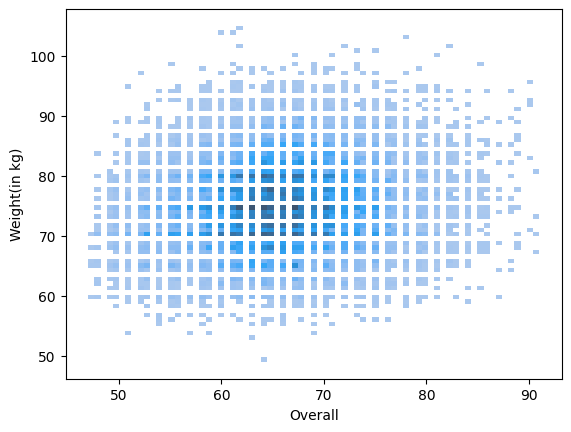

In [21]:
sns.histplot(x=df["Overall"], y=df["Weight(in kg)"])

There is no clear pattern here. Therefore, we can conclude that height and weight does not impact the overall rating of the player.

## Wage vs the Overall Rating

<Axes: xlabel='Overall', ylabel='Wage(in Euro)'>

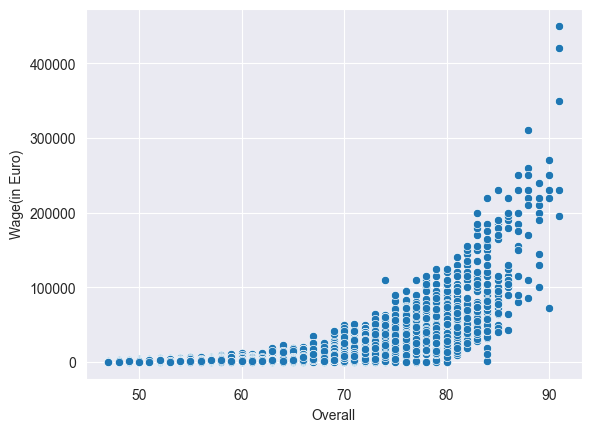

In [22]:
sns.set_style("darkgrid")
sns.scatterplot(x=df["Overall"], y=df["Wage(in Euro)"])

- Top rated players tend to have higher wages. 
- However, there are a lot of above 80 rated players that have wages below 100K euros.
- A 90 rated player has around 80K euros wage. We can have a look at that player.

In [23]:
df.loc[(df["Overall"] == 90) & (df["Wage(in Euro)"] < 100000)][
    ["Known As", "Best Position", "Nationality", "Club Name", "Wage(in Euro)"]
]

,Known As,Best Position,Nationality,Club Name,Wage(in Euro)
7,M. Neuer,GK,Germany,FC Bayern München,72000


M. Neuer the German Goalkeeper who plays for FC Bayern München has the small wage compared to other highly rated players.

## Wage vs the Best Positions of players

<Axes: xlabel='Overall', ylabel='Wage(in Euro)'>

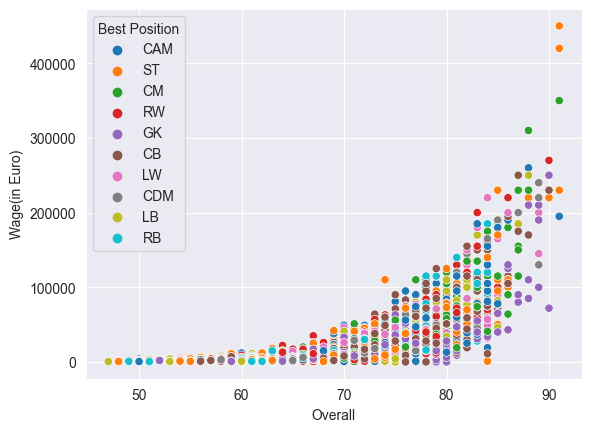

In [24]:
sns.scatterplot(x=df["Overall"], y=df["Wage(in Euro)"], hue=df["Best Position"])

- 2 strikers earn the most wages. 

In [25]:
df[
    [
        "Known As",
        "Overall",
        "Potential",
        "Nationality",
        "Club Name",
        "Best Position",
        "Wage(in Euro)",
    ]
].sort_values(by="Wage(in Euro)", ascending=False).head(10)

,Known As,Overall,Potential,Nationality,Club Name,Best Position,Wage(in Euro)
1,K. Benzema,91,91,France,Real Madrid CF,ST,450000
2,R. Lewandowski,91,91,Poland,FC Barcelona,ST,420000
3,K. De Bruyne,91,91,Belgium,Manchester City,CM,350000
28,T. Kroos,88,88,Germany,Real Madrid CF,CM,310000
5,M. Salah,90,90,Egypt,Liverpool,RW,270000
23,Bernardo Silva,88,88,Portugal,Manchester City,CAM,260000
6,T. Courtois,90,91,Belgium,Real Madrid CF,GK,250000
30,A. Rüdiger,87,88,Germany,Real Madrid CF,CB,250000
24,João Cancelo,88,88,Portugal,Manchester City,LB,250000
13,Casemiro,89,89,Brazil,Manchester United,CDM,240000


- K. Benzema and R. Lewandowski are the highest earners and both are the strikers.
- In the list of top 10 highest earners, 8 of them are Europeans and all of them play for European clubs.
- 4 players play for Real Madrid CF (Spanish club) and 3 play for Manchester City (English club).
- Both Spanish clubs and English clubs have 5 players each in the top 10 highest earners. Therefore, we can say that these countries spend the most in terms of wages.
- We can further look into this claim.
- Casemiro (the 10th highest earner) earns almost half of the K. Benzema (the highest earner). 

To expand on wage more, we can look into the top 100 highest earners based on this data.

In [26]:
top_100_earners = df.sort_values(by="Wage(in Euro)", ascending=False).head(100)
top_100_earners.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",ST,France,34,185,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,...,91,91,91,82,82,82,78,72,78,24
28,T. Kroos,Toni Kroos,88,88,72000000,CM,CM,Germany,32,183,...,84,88,84,80,84,80,77,74,77,22
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,30,175,...,90,85,90,74,71,74,70,61,70,25


<Axes: xlabel='Overall', ylabel='Wage(in Euro)'>

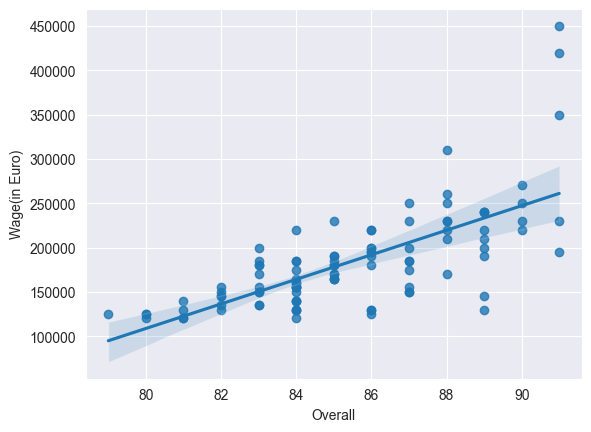

In [27]:
sns.regplot(x=top_100_earners["Overall"], y=top_100_earners["Wage(in Euro)"])

- General trend suggests that higher the Overall Rating, higher is their wage.

## Wage vs the Best Position

<Axes: xlabel='Overall', ylabel='Wage(in Euro)'>

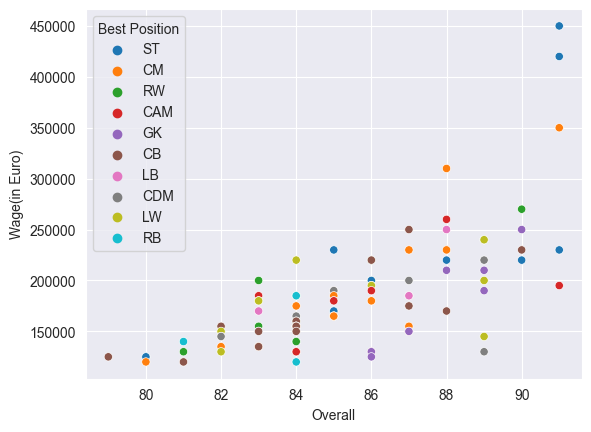

In [28]:
sns.scatterplot(
    x=top_100_earners["Overall"],
    y=top_100_earners["Wage(in Euro)"],
    hue=top_100_earners["Best Position"],
)

In [29]:
top_100_earners["Best Position"].value_counts()

Best Position
CB     18
CM     15
ST     13
LW     13
CAM     9
RW      8
CDM     8
GK      7
RB      5
LB      4
Name: count, dtype: int64

- There are 18 Center Backs (Defenders) in top 100 earners.
- Left Backs and Right Backs (Defenders) are however not highly paid.
- We can also look at the average salary for each position.

In [30]:
print("Average wage based on position of top 100 highest earners")
top_100_earners.groupby("Best Position")["Wage(in Euro)"].mean().sort_values(
    ascending=False
).round(2)

Average wage based on position of top 100 highest earners


Best Position
ST     228846.15
LB     198750.00
CM     189333.33
CDM    184375.00
GK     180714.29
RW     178750.00
LW     178461.54
CAM    172777.78
CB     168055.56
RB     148000.00
Name: Wage(in Euro), dtype: float64

- Center Backs have a very small average salary compared to others.
- Strikers however have the highest mean salary.
- There is a difference of more than 60K euros in average salary of Strikers and Center Backs.
- We can test a hypothesis that Strikers earn more than Center Backs.

In [31]:
df["Best Position"].value_counts()

Best Position
CB     3658
ST     2635
CAM    2311
GK     2061
RW     1740
CDM    1403
RB     1347
LB     1268
CM     1104
LW     1012
Name: count, dtype: int64

In [32]:
df.groupby("Best Position")["Wage(in Euro)"].mean().sort_values(
    ascending=False
).round(2)

Best Position
CM     13775.23
LW     10030.68
CDM     9862.01
ST      9658.88
CAM     9039.64
LB      8385.25
CB      8304.00
RB      8192.98
RW      7669.91
GK      6147.94
Name: Wage(in Euro), dtype: float64

- We can say that Strikers earn more than Center Backs overall.

## Wage vs the Nationality of top 100 earners

In [33]:
top_100_earners["Nationality"].value_counts()

Nationality
Brazil            13
France            12
England           12
Spain             12
Germany            6
Portugal           6
Belgium            4
Netherlands        3
Croatia            3
Argentina          3
Italy              3
Senegal            3
Serbia             2
Denmark            2
Poland             2
Uruguay            2
Egypt              1
Cameroon           1
Morocco            1
Colombia           1
Scotland           1
Côte d'Ivoire      1
Gabon              1
Austria            1
Algeria            1
Norway             1
Korea Republic     1
Switzerland        1
Name: count, dtype: int64

- Majority of the players in the top 100 earners are European players.
- Out of the 100 top earners, 13 are Brazilian, 12 are French, 12 are English and 12 are Spanish players (49 out of 100 players)


## Wage vs Value of player